### STAT 207 Lab 4: Normal and Bernoulli

Due: Wednesday, September 25, 23:59:59

### Jaewon Kim jaewonk3

This lab consists of 3 main parts. You may add as many cells as you need in order to do the excercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". 

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

**Note: not every problem in this lab requires Python calculation. In some cases you can just work it out and type in your solution.** 


### Part 1: Normal Distribution (10 pts)

The normal family of distributions are used widely in practice, both because of the Central Limit Theorem for the large sample distribution of averages, and because many types of measurements appear to follow a normal distribution to a reasonable approximation. The SciPy.stats library provides the 'norm' function with methods for computing the probability density function (.pdf), cumulative distribution function (.cdf), percent point function (.ppf - like the quantile function for data), random variate generation (.rvs), and other parameters (.mean, .std, .median etc). Please study the documentation here:
[scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

Let's let 'norm' help us experiment with the normal distribution. Note that for the 'norm' function the loc keyword specifies the mean, and the scale keyword specifies the standard deviation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm

**a) Use the .mean and .std methods to show that distribution implemented by the norm function with loc=12 and scale=5 has mean 12 and standard devation 5.**

In [2]:
loc, scale = 12, 5
x = np.linspace(norm.ppf(0.0, loc = loc, scale = scale),
               norm.ppf(0.99, loc = loc, scale = scale), 100)
params = ['mean', 'std']
pop = [norm.mean(loc = loc, scale = scale),
      norm.std(loc = loc, scale = scale)]
pd.DataFrame({'population': pop}, index = params)

C:\Users\jaewo\Anaconda3\lib\site-packages\numpy\core\function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\jaewo\Anaconda3\lib\site-packages\numpy\core\function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


,population
mean,12.0
std,5.0


**b) Suppose the random variable $X$ is normally distributed with mean 12 and standard deviation 5. Compute $P(X \le 7)$.**

In [3]:
norm.cdf(7, loc = loc, scale = scale)

0.15865525393145707

**c) For the same random variable $X$ as in b), compute $P(7 \lt X \le 17)$**

In [4]:
norm.cdf(17, loc = loc, scale = scale) - norm.cdf(7, loc = loc, scale = scale)

0.6826894921370859

**d) With the same $X$, compute the probability that $X$ takes a value within 2 standard deviations of its mean value.**

In [5]:
norm.cdf(22, loc = loc, scale = scale) - norm.cdf(2, loc = loc, scale = scale)

0.9544997361036416

**e) With the same $X$, compute the 10th percentile of its distribution.**

In [6]:
norm.ppf(0.1, loc = loc, scale = scale)

5.592242172276999

### Part 2: Sampling from the Normal distribution (10 pts)

According to the square root rule, if $X_1, X_2, \ldots, X_n$ is an independent random sample from a distribution with mean $\mu$ and standard deviation $\sigma$, the the sample mean

$$
\bar{X} = {X_1+X_2+\cdots+X_n\over n}
$$

has the same mean as the original variable, i.e. $E(\bar{X})=\mu$, but reduced standard devation:

$$
SD(\bar{X}) = {\sigma\over \sqrt{n}}.
$$



**a) Use 'norm' to generate a random sample of 100 observations from the normal distribution with mean = 12 and standard devation =5. Save the values in a list and display the results.**

In [7]:
sample = norm.rvs(loc = loc, scale = scale, size = 100)
sample

array([20.68946959, 15.90437415, 13.59904967,  5.42197497, 17.33993362,
       15.50162476,  9.62185301, 14.50667629, 20.08686605,  6.82285754,
       -1.54714795, 18.68293233, 11.18962233,  3.63767336,  1.74986094,
       16.91403769, 12.67857917,  9.22950892, 29.20009111,  7.21995114,
        8.44087312, 13.13611146, 12.65664217, 20.84320195, 10.33464282,
        9.53805628, 12.24569155,  1.78902524, 13.0340003 , 11.5717221 ,
       13.52215552, 15.23001723, 12.75349926, 19.33958477, 13.44603764,
        7.6312762 ,  5.81570382, 19.84910982, 21.40641446, 20.68819648,
       13.35381436, 22.30235198, 11.18893948,  7.49312901, 14.3706533 ,
       18.13314839, -1.55545039, 12.61375807, 15.30558838,  5.908656  ,
       14.90590588,  4.77826136,  7.8693484 , 13.25589936, 13.49817707,
       15.09303221, 18.78601545, 10.32919843, 25.72637161, 12.03391651,
       14.12966011, 20.23320562, 13.91710611, 12.68105076, 24.37181069,
        3.19631035,  8.71307079,  5.48770988, 10.71280697, 16.93

**b) Compute the sample mean and standard deviation for the numbers you generated in part a). Comment on how close or far they are from the population mean and standard deviation.**

In [8]:
s = [np.mean(sample),
    np.std(sample)]
pd.DataFrame({'Population': pop, 'Sample': s}, index = params)

,Population,Sample
mean,12.0,12.505016
std,5.0,5.937010


The sample mean and standard deviation are pretty close to the original means and standard deviation.  

**c) Make a density histogram of the values you got in a)** 

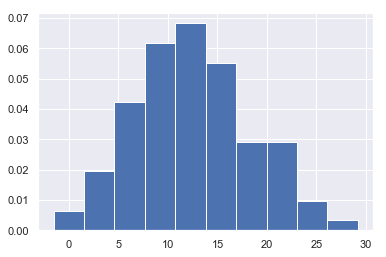

In [9]:
plt.hist(sample, density = True)
plt.show()

**d) Write a loop to repeat the following process 50 times:  draw a sample of 100 observations from the normal distribution with mean=12 and standard devation =5. Compute the sample mean for each sample. Store your resulting sample means in a data frame or list and display them.**

In [10]:
a = []
for i in range(50):
    sample = norm.rvs(loc = loc, scale = scale, size = 100)
    a.append(np.mean(sample))
df = pd.DataFrame({'Mean': a})
df

,Mean
0,11.632931
1,13.205376
2,12.070101
3,11.388462
4,12.249279
5,11.973606
6,11.045398
7,12.247252
8,11.579221
9,11.993496


**e) Compute the sample mean and standard deviation of the 50 sample means you got in d). Comment on how they compare with the theoretical values predicted by the square root rule.** 

In [11]:
s2 = [df['Mean'].mean(), df['Mean'].std()]
df2 = pd.DataFrame({'Sample': s2}, index = params)
df2

,Sample
mean,11.942762
std,0.562694


The theoratical value of the standard deviation of the sample mean is equal to the original standard deviation divided by the square root of sample size. 
std = 5
sample size = 100
theoratical value = 5/sqrt(100) = 5/10 = 0.5
The value will be 0.5. Thus, we can conclude that this is credible.

### Part 3 Bernoulli random variables (5 pts)

**a) A Bernoulli random variable can only take two possible values: 0 or 1. Suppose $X$ is a Bernoulli random variable and $P(X=1)=0.8$. What does $P(X=0)$ equal? (answer only).**

0.2

**b)The mean $\mu$ of a discrete random variable $X$ with possible values $x_1, x_2, \ldots$ is given by**

$$
\mu = E(X) = x_1 P(X=x_1) + x_2 P(X=x_2) + \ldots 
$$

**where the sum ranges over all possible values $x_i$ for $X$. If $X$ is a Bernoulli random variable with $P(X=0)= 0.3$, find $E(X)$ by hand (i.e. not using Python). Show work.**


Solution:
1) 𝜇 = 𝑥1𝑃(𝑋=𝑥1) + 𝑥2𝑃(𝑋=𝑥2) = 0*P(X=0) + 1P(X=1)
2) 𝜇 = P(X=1) = E(X) = 0.7
0.7

**c) The variance of a random variable with mean $\mu$ is given by**

$$
Var(X) = E((X-\mu)^2)
$$

**If $X$ is a Bernoulli random variable and $P(X=1)=0.6$, compute the variance by hand. (show work)**

Solution:
1) 1 - P(X=1) = P(X=0)
2) 1 - 0.6 = P(X=0) = 0.4
3) Var(X) = P(X=1) * P(X=0) = 0.6 * 0.4 = 0.24
0.24